# Importation du fichier CSV et des packages + Mise en lien avec Pycharm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import missingno as msno
import numpy as np; np.random.seed(42)
print("Setup Complete")

Setup Complete


In [2]:
df = pd.read_csv("C:\\Users\\Apprenant\\PycharmProjects\\sys_recommandation\\data\\recommandation.tsv", sep='\t', low_memory=False)

# Création de mon DataFrame

In [3]:
#Je sélectionne les colonnes qui me semblent essentielles pour le nutri_score et je crée un dataframe indépendant pour passer au nettoyage et au traitement de ma data.
df_nutri_score = df[['product_name', 'energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr', 'countries_en']]

In [4]:
#Je renomme mes colonnes
df_nutri_score = df_nutri_score.rename(columns={'energy_100g': 'energy', 'sugars_100g': 'sugar', 'fiber_100g': 'fiber','proteins_100g': 'protein', 'sodium_100g': 'sodium', 'saturated-fat_100g': 'saturated_fat', 'nutrition-score-fr_100g': 'nutrition_score', 'nutrition_grade_fr': 'nutrition_echelon', 'countries_en': 'distribution' })

# Sélection de la France comme pays principal

In [5]:
#test = df_nutri_score[df_nutri_score.distribution ]
#df_nutri_score[df_nutri_score.distribution] = df_nutri_score[df_nutri_score.distribution == 'France']
#print(df_nutri_score.head())

df_nutri_score_fr = df_nutri_score[df_nutri_score.distribution == 'France']


# MISSING DATA VISUALIZATION

In [6]:
# msno.bar(df_nutri_score_fr);
# plt.title("visualization of nullity by column");
# #

Pourcentage de données présentes par colonne

In [7]:

percentage_per_column_notmissing_value = ((df_nutri_score_fr.isnull().sum() * 100 / len(df_nutri_score_fr)) - 100).abs()
print(percentage_per_column_notmissing_value)



product_name          94.991973
energy                74.374198
sugar                 72.972951
fiber                 49.622865
protein               74.184623
sodium                73.010060
saturated_fat         72.918095
nutrition_score       71.833077
nutrition_echelon     71.833077
distribution         100.000000
dtype: float64


Pourcentage de données manquantes par colonne

In [8]:
percentage_per_column_missing_value = df_nutri_score_fr.isnull().sum() * 100 / len(df_nutri_score_fr)
print(percentage_per_column_missing_value)


product_name          5.008027
energy               25.625802
sugar                27.027049
fiber                50.377135
protein              25.815377
sodium               26.989940
saturated_fat        27.081905
nutrition_score      28.166923
nutrition_echelon    28.166923
distribution          0.000000
dtype: float64


Visualiser le pourcentage de valeurs manquantes face à l'ensemble des valeurs:

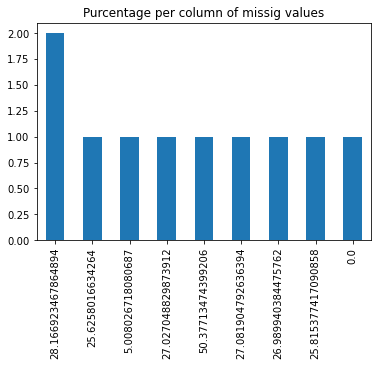

In [9]:
percentage_per_column_missing_value.value_counts().plot(kind='bar');
plt.title("Purcentage per column of missig values");

Visualiser le pourcentage de valeurs non manquantes face à l'ensemble des valeurs pour comparer:

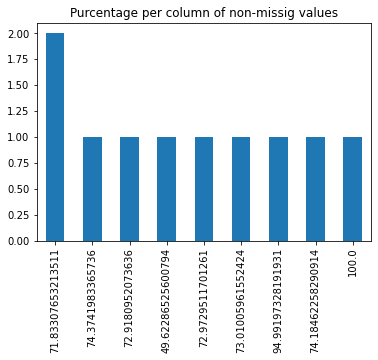

In [10]:
percentage_per_column_notmissing_value.value_counts().plot(kind='bar');
plt.title("Purcentage per column of non-missig values");


# Cleaning valeurs manquantes

Je supprime les produits manquants:

In [11]:
df_nutri_score_fr=df_nutri_score_fr.dropna(subset = ['product_name'])
print(df_nutri_score_fr.isnull().sum())

product_name             0
energy               25919
sugar                27647
fiber                56435
protein              26153
sodium               27604
saturated_fat        27711
nutrition_score      29051
nutrition_echelon    29051
distribution             0
dtype: int64


Visualiser le tableau dans son ensemble

In [12]:
df_nutri_score_fr

,product_name,energy,sugar,fiber,protein,sodium,saturated_fat,nutrition_score,nutrition_echelon,distribution
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
46,Naturablue original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
47,Filet de bœuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
51,Naturakrill original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
138,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
...,...,...,...,...,...,...,...,...,...,...
356017,Thé vert Earl grey,21.0,0.5,0.2,0.5,0.01,0.2,NaN,NaN,France
356018,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
356019,Rillette d'oie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
356024,Biscottes bio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France


# Je trie mes produits par ordre alphabétique

In [13]:
df_nutri_score_fr = df_nutri_score_fr.notnull().sort_values(by = 'product_name')
df_nutri_score_fr

,product_name,energy,sugar,fiber,protein,sodium,saturated_fat,nutrition_score,nutrition_echelon,distribution
0,True,False,False,False,False,False,False,False,False,True
264431,True,False,False,False,False,False,False,False,False,True
264430,True,True,True,True,True,True,True,True,True,True
264429,True,True,True,True,True,True,True,True,True,True
264428,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
222002,True,True,True,True,True,True,True,True,True,True
222001,True,True,True,True,True,True,True,True,True,True
222000,True,True,True,True,True,True,True,True,True,True
221998,True,True,True,True,True,True,True,True,True,True


In [14]:
df_nutri_score_fr.notnull().sort_values(by=df_nutri_score_fr.columns.to_list(), ascending=False)

,product_name,energy,sugar,fiber,protein,sodium,saturated_fat,nutrition_score,nutrition_echelon,distribution
0,True,True,True,True,True,True,True,True,True,True
264431,True,True,True,True,True,True,True,True,True,True
264430,True,True,True,True,True,True,True,True,True,True
264429,True,True,True,True,True,True,True,True,True,True
264428,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
222002,True,True,True,True,True,True,True,True,True,True
222001,True,True,True,True,True,True,True,True,True,True
222000,True,True,True,True,True,True,True,True,True,True
221998,True,True,True,True,True,True,True,True,True,True


Je supprime les lignes où l'ensemble des colonnes hors celle de product_name sont vides

In [15]:
df_nutri_score_fr = df_nutri_score_fr.dropna(axis=0, subset=['energy', 'sugar', 'fiber', 'sodium', 'protein', 'saturated_fat'])

Il existe dans la db beaucoup de valeurs manquantes. 
J'ai supprimé les noms des produits manquants pour ne pas avoir de données oprhelines. 
Je vais traiter les valeurs nulles de l'energie, fibres, proteins etc.
Pour ces colonnes, je ne peux pas me permettre de dupliquer la valeur d'à côté ou de supprimer la ligne en entier.
La meilleure solution me semble être celle de remplacer la valeur manquante par 0.
Après avoir regardé plusieurs produits, il me semble plus probable que NaN équivaut 
à une valeur nulle soit 0 et n'est pas un manque d'informations. 
exemple: Real Salt Granular 	NaN 	NaN 	NaN 	NaN 	37.857 	NaN 	NaN 	NaN

In [16]:
#Je remplace les données nulles de la colonne sucre par 0
df_nutri_score_fr['sugar'] = df_nutri_score_fr['sugar'].fillna(0)

In [17]:
#Je remplace les données nulles de la colonne energy par 0
df_nutri_score_fr['energy'] = df_nutri_score_fr['energy'].fillna(0)

In [18]:
#Je remplace les données nulles de la colonne fiber par 0
df_nutri_score_fr['fiber'] = df_nutri_score_fr['fiber'].fillna(0)

In [19]:
#Je remplace les données nulles de la colonne protein par 0
df_nutri_score_fr['protein'] = df_nutri_score_fr['protein'].fillna(0)

In [20]:
#Je remplace les données nulles de la colonne sodium par 0
df_nutri_score_fr['sodium'] = df_nutri_score_fr['sodium'].fillna(0)

In [21]:
#Je remplace les données nulles de la colonne saturated_fat par 0
df_nutri_score_fr['saturated_fat'] = df_nutri_score_fr['saturated_fat'].fillna(0)

In [22]:
#Je regarde ma quantité de data
df_nutri_score_fr.shape

(117753, 10)

In [23]:
#Je regarde mes 10 premières lignes
df_nutri_score_fr

,product_name,energy,sugar,fiber,protein,sodium,saturated_fat,nutrition_score,nutrition_echelon,distribution
0,True,False,False,False,False,False,False,False,False,True
264431,True,False,False,False,False,False,False,False,False,True
264430,True,True,True,True,True,True,True,True,True,True
264429,True,True,True,True,True,True,True,True,True,True
264428,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
222002,True,True,True,True,True,True,True,True,True,True
222001,True,True,True,True,True,True,True,True,True,True
222000,True,True,True,True,True,True,True,True,True,True
221998,True,True,True,True,True,True,True,True,True,True


# LIEN ENTRE NUTRISCORE ET ECHELON GRADE 

In [24]:
#le lien entre nutri_core et nutrition_echelon(grade) est évident du fait du même nombre de valeurs manquantes
print(df_nutri_score_fr['nutrition_score'].isnull().sum())
print(df_nutri_score_fr['nutrition_echelon'].isnull().sum())

0
0


# Je traite les valeurs manquantes de nutriscore et Echelon grade / Nutri score vide / Nutri score Grade vide

In [25]:
#Je remplace les données nulles de la colonne nutrition echelon par 'undefined' pour ne pas induire dans l'erreur l'utilisateur avec 0
df_nutri_score_fr['nutrition_echelon'] = df_nutri_score_fr['nutrition_echelon'].fillna('undefined')
print(df_nutri_score_fr['nutrition_echelon'].isnull().sum())

0


In [26]:
#éléments le plus fréquent par colonne
print(df_nutri_score_fr.mode())

   product_name  energy  sugar  fiber  protein  sodium  saturated_fat  \
0          True    True   True   True     True    True           True   

   nutrition_score  nutrition_echelon  distribution  
0             True               True          True  


In [27]:
df_nutri_score_limit = df_nutri_score_fr[(df_nutri_score_fr['nutrition_score'] >= -15) & (df_nutri_score_fr['nutrition_score'] <= 40)]

In [28]:
df_nutri_score_limit.shape

(117753, 10)

In [29]:
df_nutri_score_fr = df_nutri_score_limit

In [30]:
df_nutri_score_fr.shape

(117753, 10)

In [31]:
#Je remplace les données nulles de la colonne nutrition echelon par 'undefined' pour ne pas induire dans l'erreur l'utilisateur avec 0
df_nutri_score_fr['nutrition_score'] = df_nutri_score_fr['nutrition_score'].fillna('undefined')
print(df_nutri_score_fr['nutrition_score'].isnull().sum())

0


# JE TRAITE LES VALEURS DOUBLES

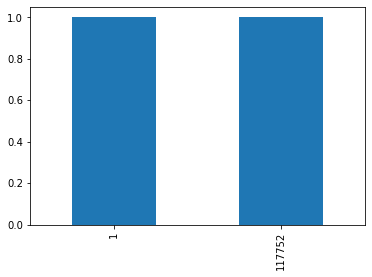

In [32]:
#j'affiche les valeurs doubles dans la colonne product_name
valeurs_doubles_product_name = df_nutri_score_fr['product_name'].duplicated().value_counts()
valeurs_doubles_product_name.value_counts().plot(kind='bar');

In [33]:
#Je mets à jour mon dataframe en supprimant les valeurs doubles
df_nutri_score_fr = df_nutri_score_fr.drop_duplicates(subset="product_name")


In [34]:
#les valeurs doubles dans la colonne 'produits' ont bien été supprimés
df_nutri_score_fr['product_name'].duplicated().value_counts()

False    1
Name: product_name, dtype: int64

# JE TRAITE LES VALEURS ABERRANTES  (<0, >100, Somme > 100)


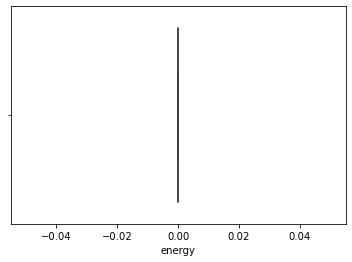

In [35]:
ax = sns.boxplot(x=df_nutri_score_fr['energy'])

In [36]:
df_nutri_score_sugar = df_nutri_score_fr[(df_nutri_score_fr['sugar'] >= 0) & (df_nutri_score_fr['sugar'] <= 100)]
#df_nutri_score[df_nutri_score.sugar < 100]

In [37]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_sugar.shape

(1, 10)

Je choisir 4000kj pour le max pour me référer aux calories d'une huile. Aliment qui me semble le plus calorique.

In [38]:
df_nutri_score_energy = df_nutri_score_sugar[(df_nutri_score_sugar['energy'] >= 0) & (df_nutri_score_sugar['energy'] <= 4000)]

In [39]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_energy.shape

(1, 10)

In [40]:
df_nutri_score_fiber = df_nutri_score_energy[(df_nutri_score_energy['fiber'] >= 0) & (df_nutri_score_energy['fiber'] <= 100)]

In [41]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_fiber.shape

(1, 10)

In [42]:
df_nutri_score_protein = df_nutri_score_fiber[(df_nutri_score_fiber['protein'] >= 0) & (df_nutri_score_fiber['protein'] <= 100)]

In [43]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_protein.shape

(1, 10)

In [44]:
df_nutri_score_sodium = df_nutri_score_protein[(df_nutri_score_protein['sodium'] >= 0) & (df_nutri_score_protein['sodium'] <= 100)]

In [45]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_sodium.shape

(1, 10)

In [46]:
df_nutri_score_saturated_fat = df_nutri_score_sodium[(df_nutri_score_sodium['saturated_fat'] >= 0) & (df_nutri_score_sodium['saturated_fat'] <= 100)]

In [47]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_saturated_fat.shape

(1, 10)

In [48]:
#j'écrase mon tableau sur la dernière version mise à jour
df_nutri_score_fr = df_nutri_score_saturated_fat

In [49]:
#Je compare le nombre de valeurs avec df_nutri_score_saturated_fat pour voir si mon nombre de valeurs est identique
df_nutri_score_fr.shape

(1, 10)

In [50]:
df_nutri_score_fr.head(10)

,product_name,energy,sugar,fiber,protein,sodium,saturated_fat,nutrition_score,nutrition_echelon,distribution
0,True,False,False,False,False,False,False,False,False,True


In [51]:
df_nutri_score_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   product_name       1 non-null      bool 
 1   energy             1 non-null      bool 
 2   sugar              1 non-null      bool 
 3   fiber              1 non-null      bool 
 4   protein            1 non-null      bool 
 5   sodium             1 non-null      bool 
 6   saturated_fat      1 non-null      bool 
 7   nutrition_score    1 non-null      bool 
 8   nutrition_echelon  1 non-null      bool 
 9   distribution       1 non-null      bool 
dtypes: bool(10)
memory usage: 18.0 bytes


# Créer une fonction permettant de remonter les paires de variables les plus corrélées

In [52]:
corr = df.corr() 
c1 = corr.abs().unstack()
c2 = c1.sort_values(ascending = True)
c2.head(20)

-fructose_100g               vitamin-b6_100g                0.000000
vitamin-b12_100g             -fructose_100g                 0.000000
-fructose_100g               vitamin-b12_100g               0.000000
vitamin-b6_100g              -fructose_100g                 0.000000
iron_100g                    magnesium_100g                 0.000054
magnesium_100g               iron_100g                      0.000054
salt_100g                    fiber_100g                     0.000059
fiber_100g                   salt_100g                      0.000059
                             sodium_100g                    0.000059
sodium_100g                  fiber_100g                     0.000059
                             sugars_100g                    0.000083
sugars_100g                  sodium_100g                    0.000083
salt_100g                    sugars_100g                    0.000084
sugars_100g                  salt_100g                      0.000084
vitamin-d_100g               calci

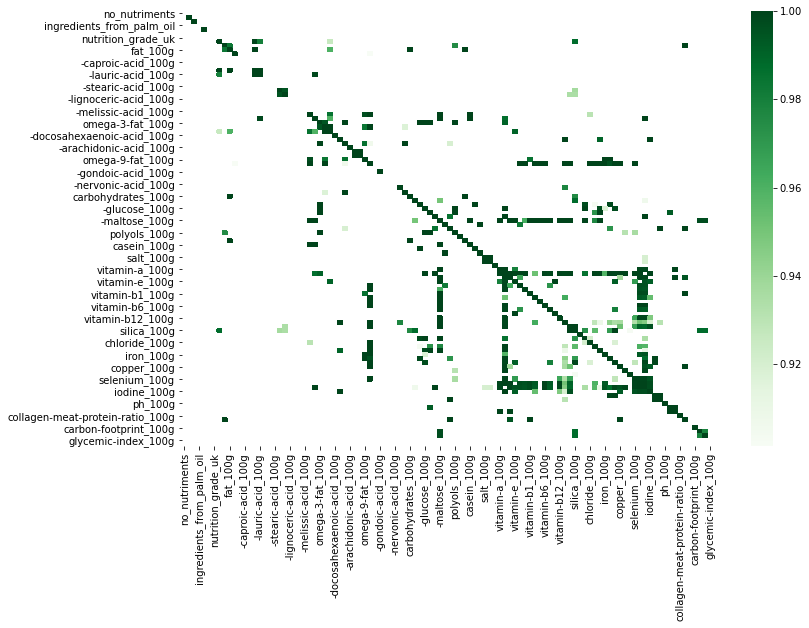

In [53]:
corr = df.corr()

kot = corr[corr>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens");

# Lien entre Salt et Sodium

In [54]:
sodium_corr = corr['salt_100g']

In [55]:
sodium_corr = sodium_corr.abs().sort_values(ascending=False)
sodium_corr.head(11)

salt_100g                           1.000000
sodium_100g                         1.000000
molybdenum_100g                     0.920071
silica_100g                         0.853801
iodine_100g                         0.811079
-arachidonic-acid_100g              0.641594
omega-9-fat_100g                    0.545704
-oleic-acid_100g                    0.474696
collagen-meat-protein-ratio_100g    0.462634
caffeine_100g                       0.444155
-lauric-acid_100g                   0.414505
Name: salt_100g, dtype: float64

La corrélation entre le sodium et le sel est évident du fait de leur coef de corrélation. 

# Lien entre fat et saturated_fat

In [56]:
fat_corr = corr['fat_100g']

In [57]:
fat_corr_t = fat_corr.abs().sort_values(ascending=False)
fat_corr_t.head(11)

fat_100g                       1.000000
-capric-acid_100g              1.000000
proteins_100g                  1.000000
carbohydrates_100g             1.000000
energy-from-fat_100g           0.983306
-eicosapentaenoic-acid_100g    0.959980
monounsaturated-fat_100g       0.866786
omega-9-fat_100g               0.798047
serum-proteins_100g            0.780789
-lauric-acid_100g              0.773787
energy_100g                    0.739380
Name: fat_100g, dtype: float64

In [58]:
fat_st_fat_corr = corr['fat_100g'].corr(corr['saturated-fat_100g'],method='pearson', min_periods=1)
print(fat_st_fat_corr)

0.8032012610180584


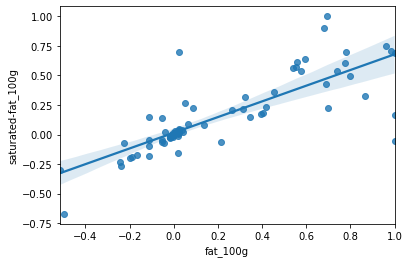

In [59]:
sns.regplot(x=corr['fat_100g'], y=corr['saturated-fat_100g']);

 En ce qui concerne fat et saturated-fat il y un lien, la corrélation est positive. Soit les valeurs les plus grandes de saturated-fat_100gr sont en lien avec les valeurs les plus grandes de fat_100gr

# HEATMAP VARIABLES FINALES

C:\Users\Apprenant\anaconda3\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Apprenant\anaconda3\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


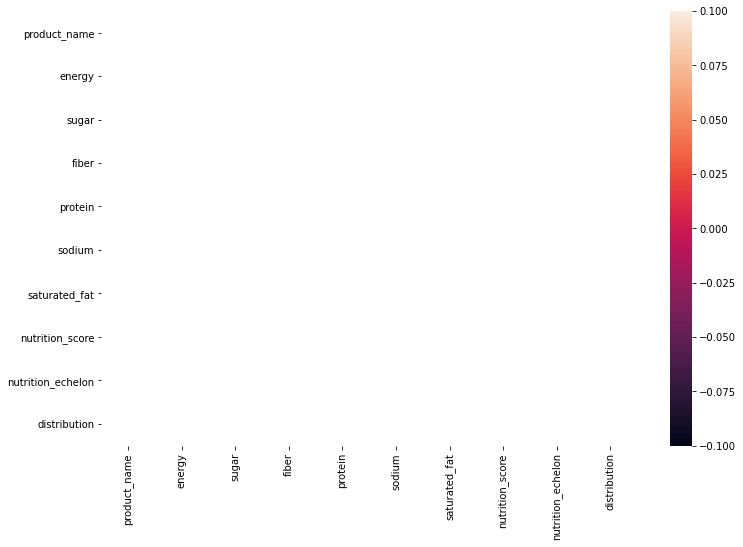

In [60]:
test = df_nutri_score_fr.corr()
kot = test[test>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot);

In [61]:
df_nutri_score_fr.shape

(1, 10)

In [62]:
df_nutri_score_fr.to_csv("C:\\Users\\Apprenant\\PycharmProjects\\sys_recommandation\\data\\recommandation_t.csv", index = False)

In [63]:
df_nutri_score_fr.describe()

,product_name,energy,sugar,fiber,protein,sodium,saturated_fat,nutrition_score,nutrition_echelon,distribution
count,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1
top,True,False,False,False,False,False,False,False,False,True
freq,1,1,1,1,1,1,1,1,1,1
